In [2]:
#imports 
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dl = DataLoader(
    datasets.ImageFolder(r"C:\Users\felip\OneDrive\Documentos\GitHub\Brain-Tumor-Detector\Dataset\Training", tf),
    batch_size=32, shuffle=True, num_workers=4, pin_memory=True
)

test_dl = DataLoader(
    datasets.ImageFolder(r"C:\Users\felip\OneDrive\Documentos\GitHub\Brain-Tumor-Detector\Dataset\Testing", tf),
    batch_size=32, shuffle=False, num_workers=4, pin_memory=True
)

In [3]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 4)
).to(device)


In [4]:
opt = optim.Adam(model.parameters(), 1e-4)
loss_fn = nn.CrossEntropyLoss()

In [5]:
model.train()

for epoch in range(25):
    running_loss = 0

    for x, y in train_dl:
        opt.zero_grad()

        loss = loss_fn(model(x.to(device)), y.to(device))
        loss.backward()

        running_loss += loss

        opt.step()

    print(f'Epoch {epoch + 1}: Loss was {running_loss}')

Epoch 1: Loss was 149.82174682617188
Epoch 2: Loss was 100.99323272705078
Epoch 3: Loss was 83.14884185791016
Epoch 4: Loss was 72.87945556640625
Epoch 5: Loss was 65.0829849243164
Epoch 6: Loss was 57.766876220703125
Epoch 7: Loss was 50.88472366333008
Epoch 8: Loss was 44.80803680419922
Epoch 9: Loss was 40.39932632446289
Epoch 10: Loss was 36.721839904785156
Epoch 11: Loss was 32.529090881347656
Epoch 12: Loss was 28.765636444091797
Epoch 13: Loss was 24.98235321044922
Epoch 14: Loss was 22.523584365844727
Epoch 15: Loss was 20.75394630432129
Epoch 16: Loss was 18.349943161010742
Epoch 17: Loss was 16.803524017333984
Epoch 18: Loss was 14.82269287109375
Epoch 19: Loss was 14.317502975463867
Epoch 20: Loss was 13.716915130615234
Epoch 21: Loss was 11.087502479553223
Epoch 22: Loss was 10.901518821716309
Epoch 23: Loss was 8.89100170135498
Epoch 24: Loss was 10.262925148010254
Epoch 25: Loss was 8.079781532287598


In [6]:
model.eval()
test_loss, correct = 0.0, 0
with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        test_loss += loss_fn(logits, y).item() * y.size(0)

        preds = logits.argmax(1)
        correct += (preds == y).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100 * correct / len(test_dl.dataset)

print(f'Test Loss: {test_loss}, Accuracy: {accuracy}%')

Test Loss: 0.12501080368782594, Accuracy: 96.9488939740656%


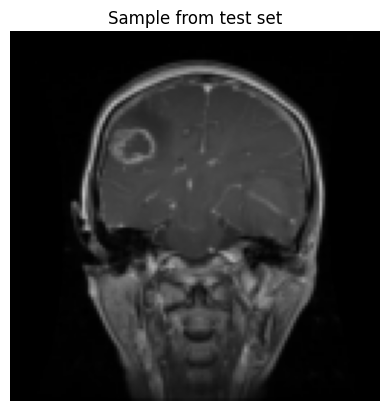

Predicted: glioma, Actual: glioma


In [10]:
import random

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample from test set')
plt.show()

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()

class_names = test_dl.dataset.classes
print(f'Predicted: {class_names[pred]}, Actual: {class_names[label]}')